# Teste Hydrobr - ANA
> dados ANA
>
> https://wallissoncarvalho.github.io/HydroBr/

In [2]:
import hydrobr as hb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

### Listar estações

In [49]:
list_st =hb.get_data.ANA.list_prec_stations()
list_st.head()


,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
0,SALINÓPOLIS,00047000,2,32,SALINÓPOLIS,PARÁ,INMET,-0.6500,-47.5500,1958/01/01,1964/12/31,7,25.0,0,100.0
1,SALINÓPOLIS,00047002,2,32,SALINÓPOLIS,PARÁ,ANA,-0.6231,-47.3536,1977/12/09,2019/08/31,43,3.5,35,18.6
2,CURUÇA,00047003,2,32,CURUÇA,PARÁ,ANA,-0.7375,-47.8536,1981/07/01,2019/07/31,39,2.4,29,25.6
3,PRIMAVERA,00047004,2,32,PRIMAVERA,PARÁ,ANA,-0.9294,-47.0994,1982/02/18,2019/08/31,38,0.0,35,7.9
4,MARUDA,00047005,2,32,MARAPANIM,PARÁ,ANA,-0.6336,-47.6583,1989/08/21,2019/07/31,31,5.0,20,35.5


### Filtrar localidade

In [54]:
lista_belem=list_st[list_st.City=='BELÉM']
lista_PA=list_st[list_st['State']=='PARÁ']
lista_poa=list_st[list_st.City=='PORTO ALEGRE']

#pegar list de código das estações
lst_code_bel=lista_belem.Code.to_list()
lst_code_poa=lista_poa.Code.to_list()

### baixar_dados 

In [55]:
data_stations=hb.get_data.ANA.prec_data(lst_code_poa)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [08:06<00:00, 121.56s/it]


In [99]:
data_stations_bel=hb.get_data.ANA.prec_data(lst_code_bel)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [12:13<00:00, 122.28s/it]


In [86]:
data_stations.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23376 entries, 1961-01-01 to 2024-12-31
Freq: D
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   03051011  20920 non-null  float64
 1   03051015  1349 non-null   float64
 2   03051043  3837 non-null   float64
 3   03051045  3993 non-null   float64
dtypes: float64(4)
memory usage: 913.1 KB


In [101]:
from plotly.offline import plot
gantt_fig=hb.Plot.gantt(data_stations)
gantt_fig_bel=hb.Plot.gantt(data_stations_bel)

plot(gantt_fig_bel)


'temp-plot.html'

In [103]:
data_stations_index = data_stations.reset_index()
data_stations_bel_index =data_stations_bel.reset_index()

data_stations_bel_index

,index,00148001,00148002,00148004,00148012,00148013,00148019
0,1949-04-01,NaN,0.0,NaN,NaN,NaN,NaN
1,1949-04-02,NaN,0.0,NaN,NaN,NaN,NaN
2,1949-04-03,NaN,0.0,NaN,NaN,NaN,NaN
3,1949-04-04,NaN,0.0,NaN,NaN,NaN,NaN
4,1949-04-05,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
27664,2024-12-27,NaN,NaN,NaN,7.3,NaN,NaN
27665,2024-12-28,NaN,NaN,NaN,9.6,NaN,NaN
27666,2024-12-29,NaN,NaN,NaN,3.0,NaN,NaN
27667,2024-12-30,NaN,NaN,NaN,4.9,NaN,NaN


In [105]:
# data_station_melt=pd.melt(data_station_index,
#                           id_vars='index',
#                           value_vars='codigo_estacao',
#                           var_name='Estacoes',
#                           value_name='Precipitacao')


##Preparando a base de dados para realizar o gráfico
data_stations_melt = pd.melt(data_stations_index, id_vars='index',
                        value_vars=lst_code_poa,   var_name="Estacoes", value_name="Precipitacao")

data_stations_bel_melt = pd.melt(data_stations_bel_index, id_vars='index',
                        value_vars=lst_code_bel,   var_name="Estacoes", value_name="Precipitacao")
data_stations_bel_melt['Estacoes'].nunique()



6

Text(0, 0.5, 'Precipitação (mm)')

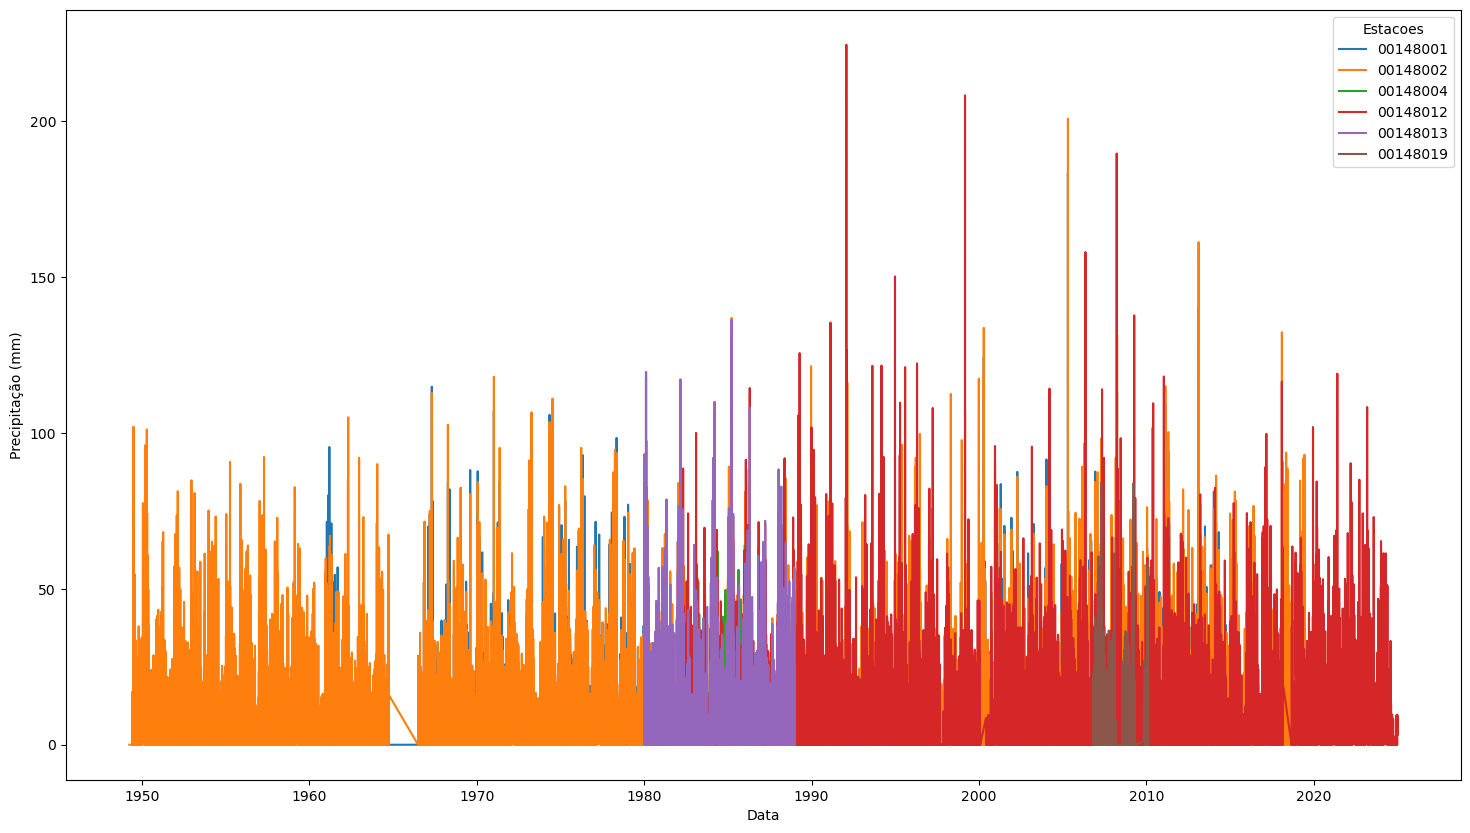

In [106]:
#fig,ax=plt.subplot(1,1,figsize=(15,10))

fig, axs = plt.subplots(1, 1, figsize=(18, 10))  

from matplotlib import rc
rc('mathtext', default='regular')
sns.lineplot(x='index',y='Precipitacao',hue='Estacoes',data=data_stations_bel_melt,ax=axs)
# Ajustando rótulos e título (opcional)
axs.set_xlabel('Data')  # Ou outro nome adequado ao eixo x
axs.set_ylabel('Precipitação (mm)')

### baixar_dados & plotar Belém